# Implementation and Visualization of a Perceptron

This notebook implements and visualizes the training of a perceptron which classifies a 2D model.
Part of the code comes from an exercise in the Udacity Deep Learning Nanodegree.

In [1]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [2]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [3]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [4]:
# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y_hat != y[i]:
            if y_hat == 0:
                # prediction == 0 -> target == 1
                W[0] = W[0] + learn_rate*X[i][0]
                W[1] = W[1] + learn_rate*X[i][1]
                b = b + learn_rate
            else:
                # prediction == 1 -> target == 0
                W[0] = W[0] - learn_rate*X[i][0]
                W[1] = W[1] - learn_rate*X[i][1]
                b = b - learn_rate
    return W, b

In [119]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 10):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    #boundary_lines = []
    weight_values = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        #boundary_lines.append((-W[0]/W[1], -b/W[1]))
        weight_values.append((W[0], W[1], b))
    #return boundary_lines
    return weight_values

In [120]:
import pandas as pd

In [121]:
data = pd.read_csv('data.csv', sep = ',', header=None)

In [122]:
X = data.to_numpy()
y = X[:,2]
X = X[:,0:2]

In [123]:
weight_values = trainPerceptronAlgorithm(X, y)

In [124]:
from matplotlib import pyplot as plt
%matplotlib inline

In [125]:
X_0 = []
X_1 = []
for i in range(len(y)):
    if y[i] == 0:
        X_0.append(X[i])
    else:
        X_1.append(X[i])
X_0 = np.array(X_0)
X_1 = np.array(X_1)

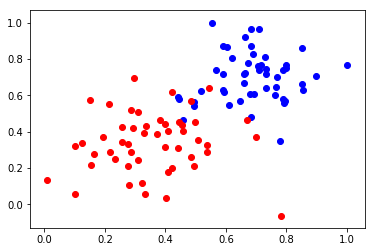

In [126]:
plt.scatter(X_0[:,0],X_0[:,1],color='blue')
plt.scatter(X_1[:,0],X_1[:,1],color='red')
my_plot = plt.gca()
my_plot.xaxis

In [127]:
weight_values

[(array([-0.10508726]), array([-0.1079807]), 0.5464504127199974),
 (array([-0.10508726]), array([-0.1079807]), 0.09645041271999703),
 (array([-0.10508726]), array([-0.1079807]), 0.08645041271999704),
 (array([-0.10508726]), array([-0.1079807]), 0.08645041271999704),
 (array([-0.10508726]), array([-0.1079807]), 0.09645041271999703),
 (array([-0.10508726]), array([-0.1079807]), 0.09645041271999703),
 (array([-0.10508726]), array([-0.1079807]), 0.09645041271999703),
 (array([-0.10508726]), array([-0.1079807]), 0.09645041271999703),
 (array([-0.10508726]), array([-0.1079807]), 0.09645041271999703),
 (array([-0.10508726]), array([-0.1079807]), 0.09645041271999703)]